In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score



In [43]:
# Load the crime data
data = pd.read_csv("crime_data.csv")

In [44]:
# Data Exploration
print(data.head())
print(data.describe())

       States  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6
         Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000


In [45]:
# Data Preprocessing
X = data.iloc[:, 1:] 

In [46]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


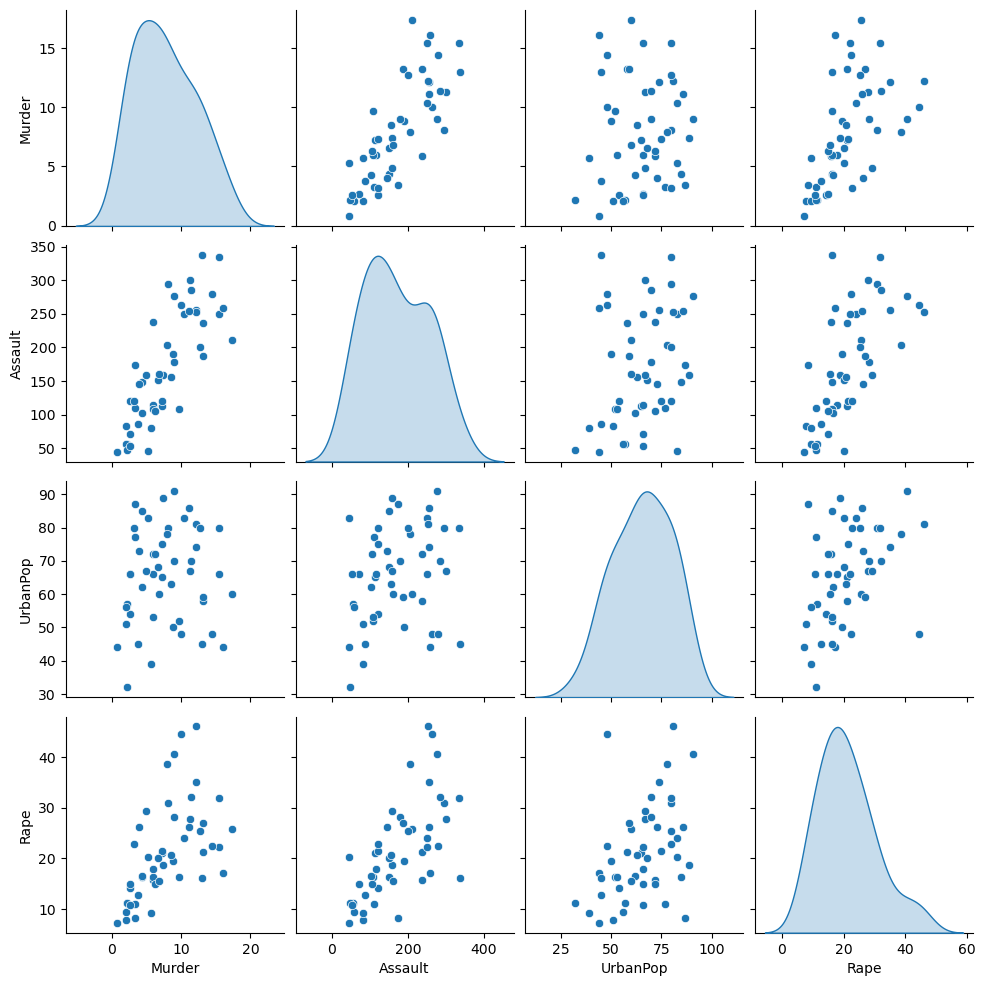

In [47]:
# EDA and Data Visualization (You can customize this part)
# Pairplot for feature visualization
sns.pairplot(data, diag_kind='kde')
plt.show()


In [48]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=5, linkage='ward')
agg_clusters = agg_clustering.fit_predict(X_scaled)

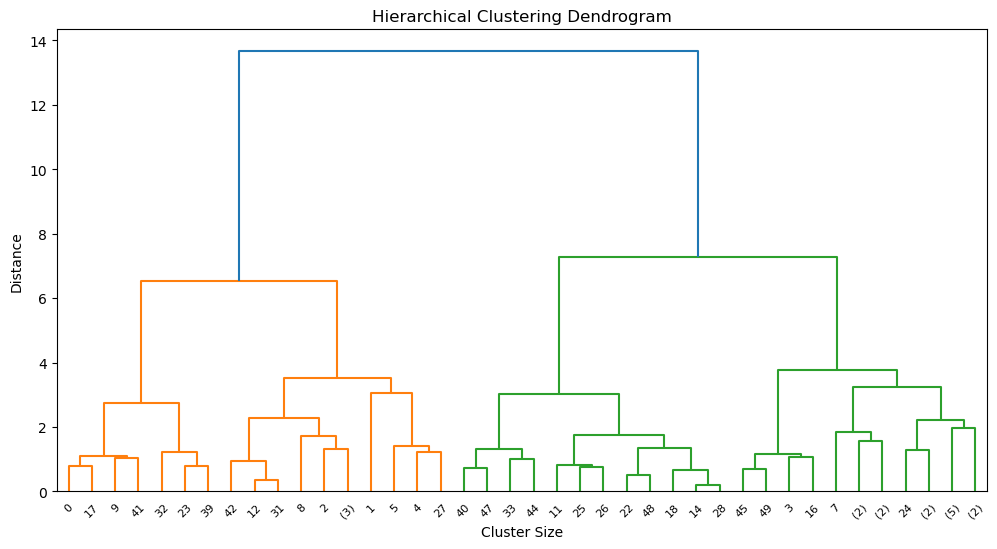

In [49]:
# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage(X_scaled, method='ward'), truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

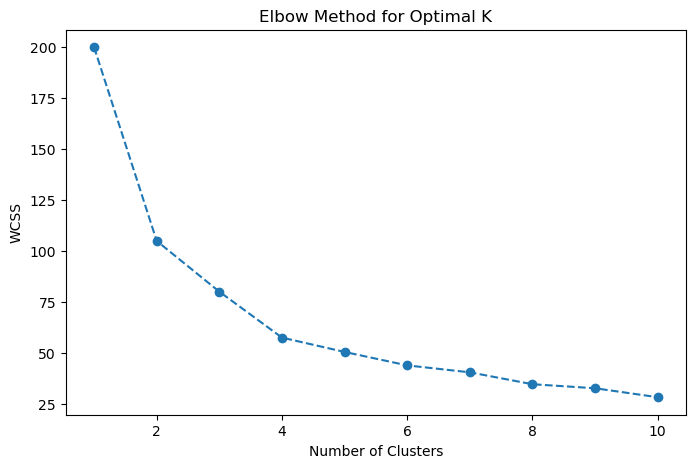

In [50]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
# K-means Clustering (Elbow Method to Find Optimal K)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


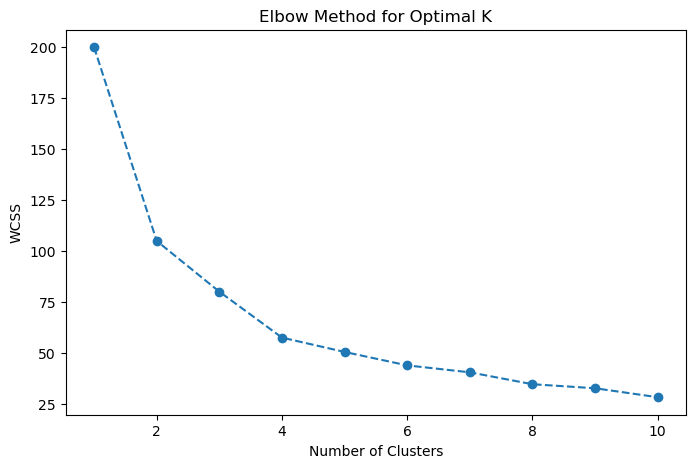

In [52]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
# Based on the Elbow Method, choose the optimal number of clusters
optimal_k = 3

In [54]:
# Perform K-means clustering with the chosen K
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, random_state=0)
kmeans_clusters = kmeans.fit_predict(X_scaled)

In [55]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_scaled)

In [56]:
# Principal Component Analysis (PCA) for Visualization
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

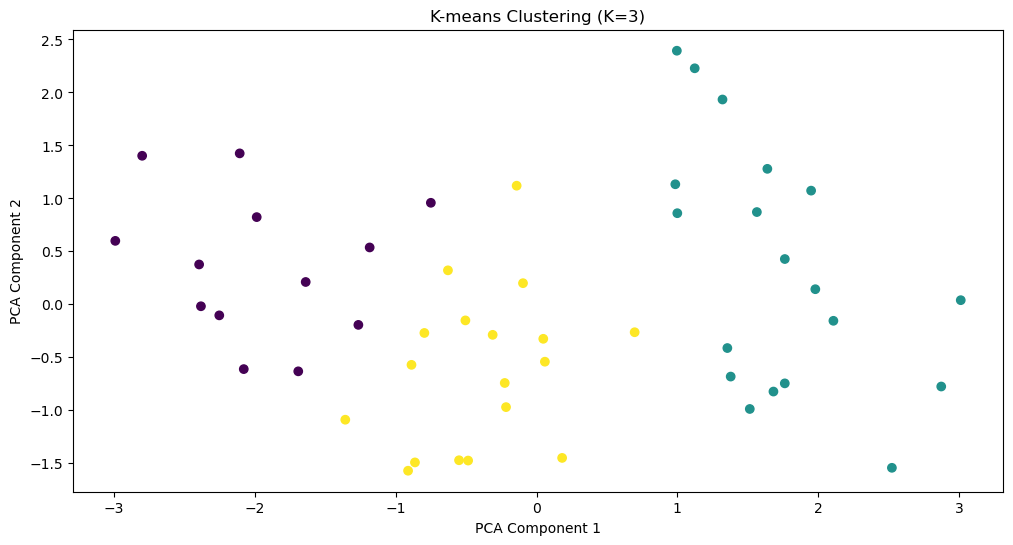

In [58]:
# Scatter plot for K-means clusters
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title(f'K-means Clustering (K={optimal_k})')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

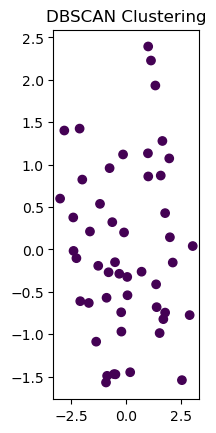

In [59]:
# DBSCAN Clustering
plt.subplot(133)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.show()

In [61]:
# Silhouette Score for K-means Clustering
silhouette_avg = silhouette_score(X_scaled, kmeans_clusters)
print(f'Silhouette Score for K-means: {silhouette_avg}')

Silhouette Score for K-means: 0.3095091512791688


In [ ]:
#####  The Silhouette Score for K-means clustering is around 0.31, suggesting that the clusters are reasonably well-separated but not highly distinct.